# An easy way to get the Uni variate graphs using Python

## By: Pranav Raj

In [ ]:
# Set the working directory
import os
#Read the cars.csv data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
os.chdir("/Users/pranavsmac/Documents/graph export")
data = pd.read_csv("cars.csv")

In [ ]:
data.dtypes

Car              object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Model             int64
Origin           object
dtype: object

In [ ]:
data.columns

Index(['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model', 'Origin'],
      dtype='object')

## Categorising under Numerical or Categorical

In [ ]:
Numerical = []
Categorical = []
for columns in data:
    if (data.dtypes[columns] == 'int64') or (data.dtypes[columns] == 'float64'):
        Numerical.append(columns)
    else:
        Categorical.append(columns)

Numerical, Categorical

(['MPG',
  'Cylinders',
  'Displacement',
  'Horsepower',
  'Weight',
  'Acceleration',
  'Model'],
 ['Car', 'Origin'])

# Implementations

Here we have added various implementations in the code. such as:

* Giving a specific dataset

* specific columns, if not mentioned, returns all columns

* A directory to save images

* Try/except to catch exceptions in program for error handling

* Dividing under categorical and numerical

* Further dividing Numerical into Discrete and continuous

* Making graphs as per Requirements

* Saving as .png and exporting to a specific directory

In [ ]:
def Graph(data, columns = '', directory = os.getcwd()):

    try:                     #to catch exceptions
        if columns == '':                #If no columns mentioned, considers all columns
            org_data = data
        else:
            org_data = data[columns]           #Takes mentioned columns only

        Numerical = []
        Categorical = []
        for columns in data:
            if (data.dtypes[columns] == 'int64') or (data.dtypes[columns] == 'float64'):         #Numerical columns
                Numerical.append(columns)
            else:
                Categorical.append(columns)       #categorical columns

        print ("***Graphs for Numerical data***\n")
        Discrete = []
        Continuous = []
        for i in Numerical:
            if len(data[i].value_counts())>10:         # Unique counts greater than 10 considered as continuous
                print ("***Graph for Continuous data***\n")
                data.boxplot(column = i,grid = True,figsize = (6,4),vert = False)  #boxplot
                data.hist(column = i,grid = False,figsize = (6,4),color = "turquoise",edgecolor = "blue")   #histogram
                plt.title(i, fontsize = 14)
                plt.savefig(directory + r'/%s.png' %i)       #saving as '.png' image in the given directory
                plt.show()
            else:                    #10 and less unique counts considered as discrete
                print ("***Graph for Discrete data***\n")
                data[i].value_counts().plot(kind = 'bar',rot=0, figsize = (6,4),color = "pink",edgecolor = "red",fontsize = 13)       #barplot
                plt.title(i, fontsize = 14)
                plt.savefig(directory + r'/%s.png' %i)
                plt.show()


        print ("\n***Graphs for Categorical data***\n")
        for i in Categorical or len(data[i].value_counts())<10:
            data[i].value_counts().plot(kind = 'bar',rot=0, figsize = (6,4),color = "yellow",edgecolor = "green",fontsize = 13)       #barplot
            plt.ylabel('count')
            plt.title(i, fontsize = 14)
            plt.savefig(directory + r'/%s.png' %i)
            plt.show()
    #error handling
    except KeyError:
        print("\nPlease Enter valid column names")
    except FileNotFoundError:
        print("\nFile not found. Please enter the valid path of directory")
    except:
        print("\nERROR")

# Function calls

In [ ]:
data = pd.read_csv("cars.csv")
data.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


***Graphs for Numerical data***

***Graph for Continuous data***



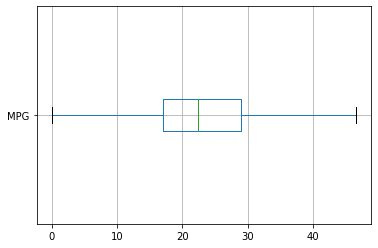

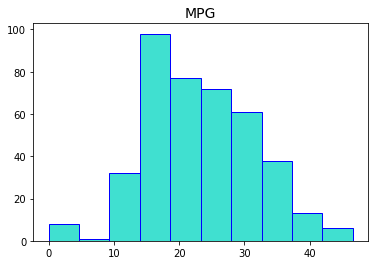

***Graph for Discrete data***



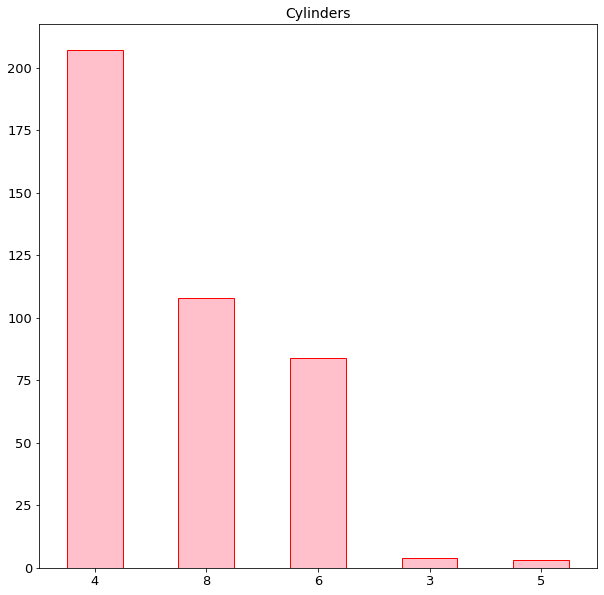

***Graph for Continuous data***



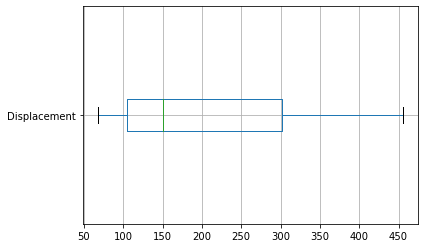

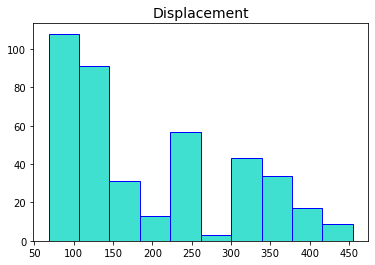

***Graph for Continuous data***



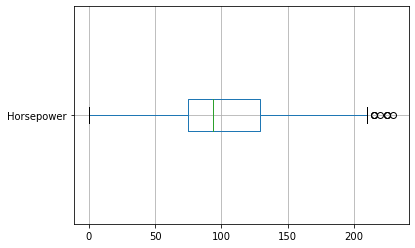

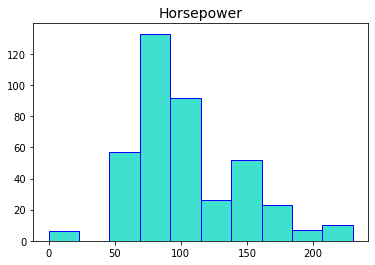

***Graph for Continuous data***



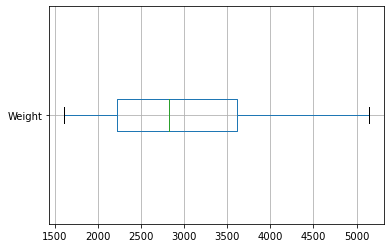

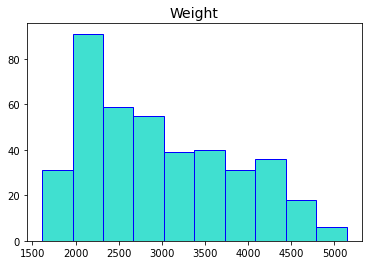

***Graph for Continuous data***



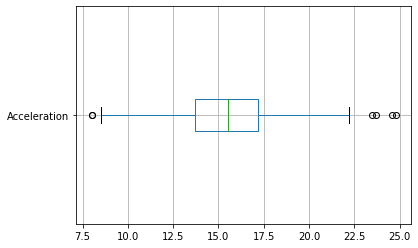

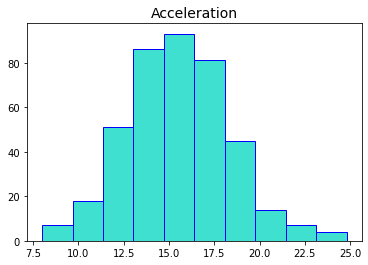

***Graph for Continuous data***



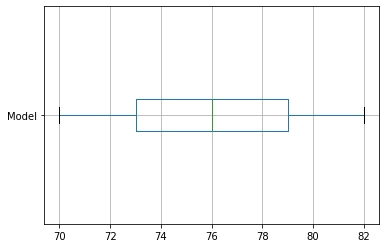

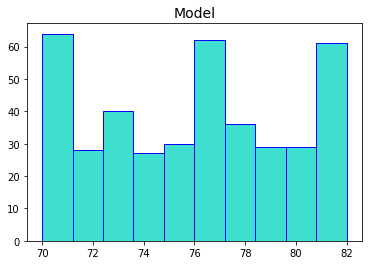


***Graphs for Categorical data***



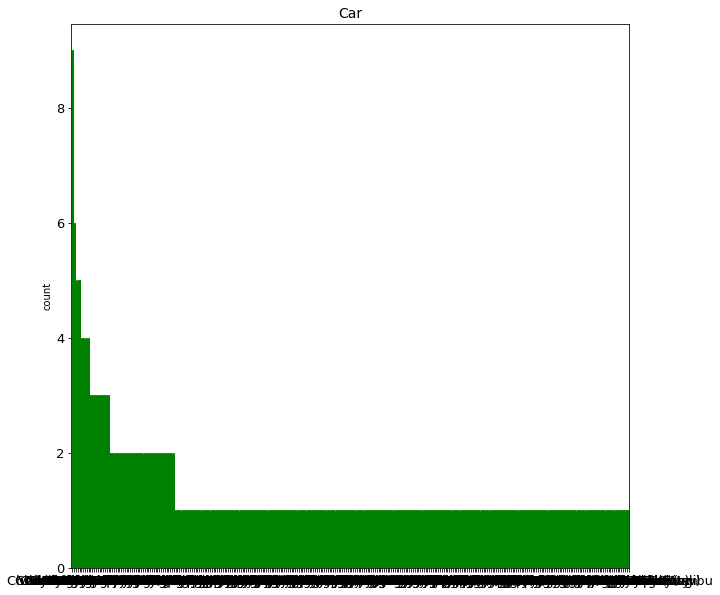

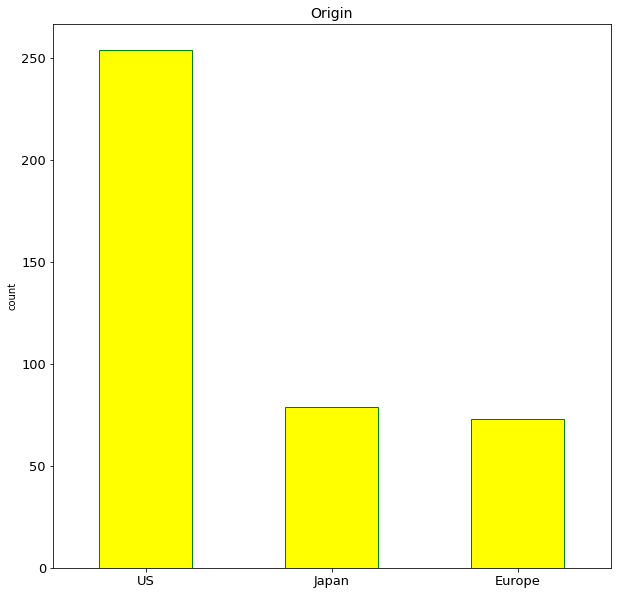

In [ ]:
Graph(data, ['Origin', 'Cylinders', 'MPG', 'Displacement', 'Horsepower', 'Acceleration'])

***Graphs for Numerical data***

***Graph for Continuous data***



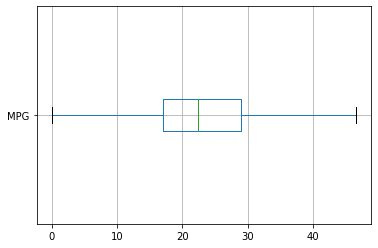

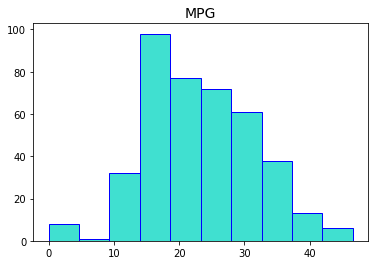

***Graph for Discrete data***



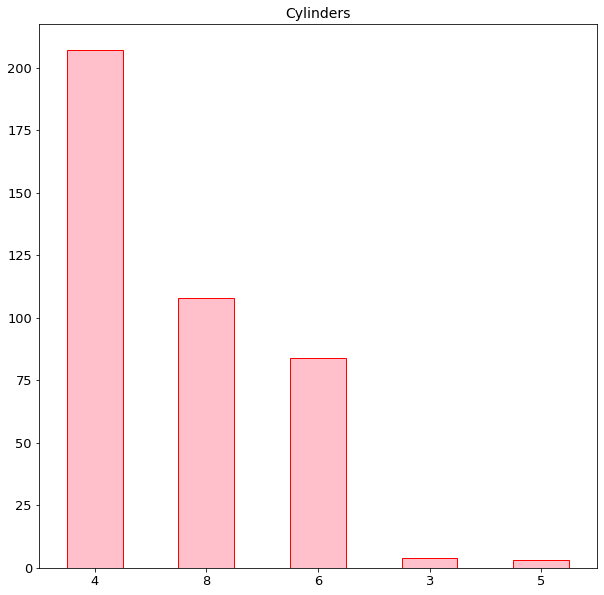

***Graph for Continuous data***



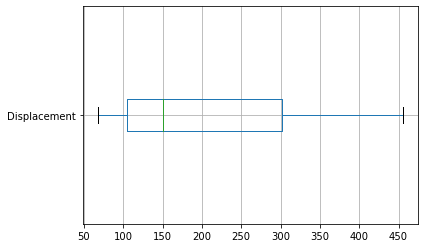

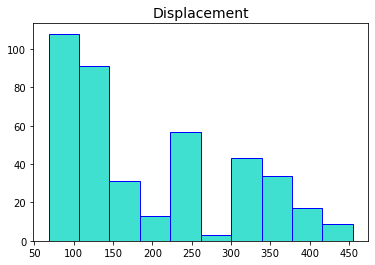

***Graph for Continuous data***



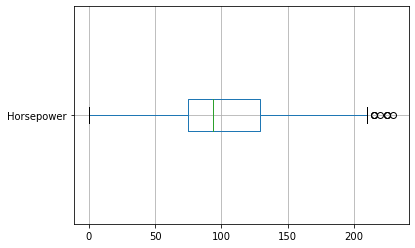

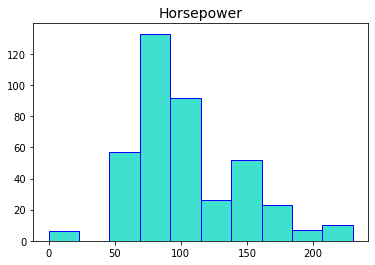

***Graph for Continuous data***



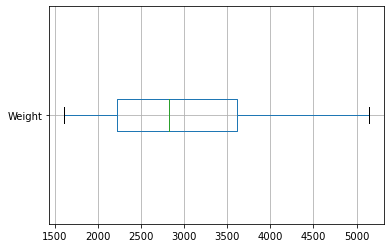

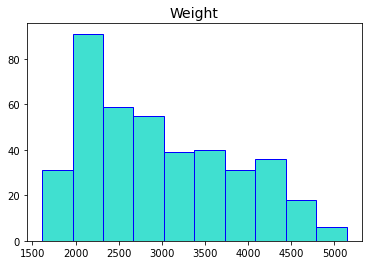

***Graph for Continuous data***



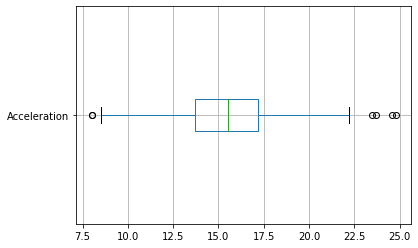

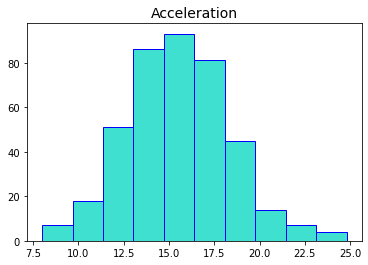

***Graph for Continuous data***



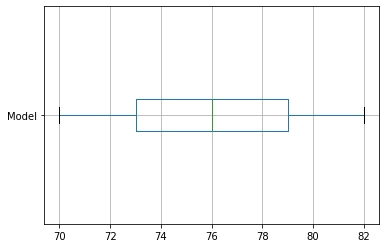

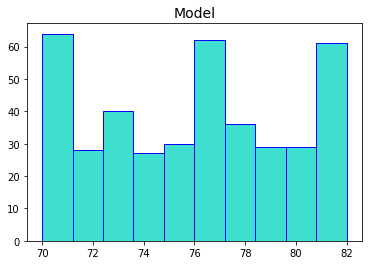


***Graphs for Categorical data***



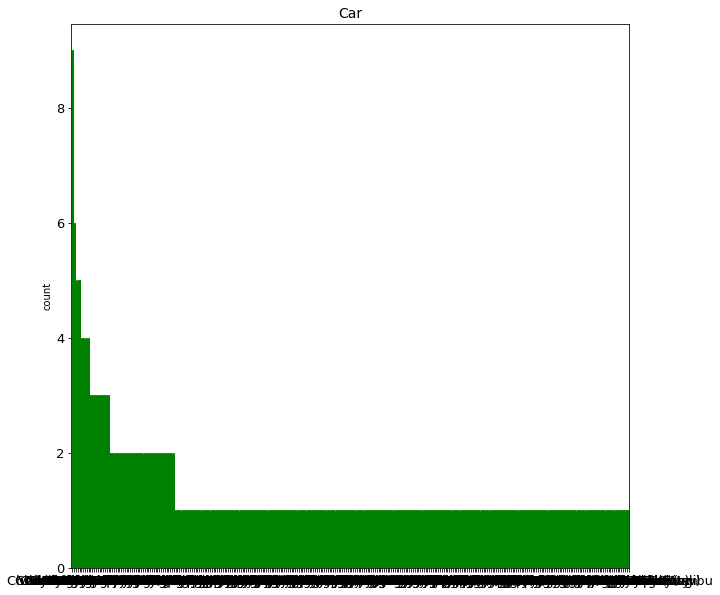

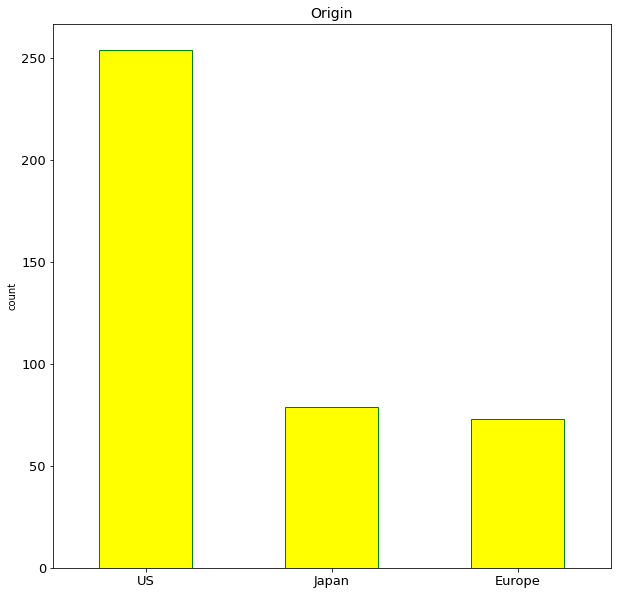

In [ ]:
Graph(data, columns = ['Origin', 'Cylinders', 'MPG', 'Displacement', 'Horsepower', 'Acceleration'], directory = "/Users/pranavsmac/Documents/graph export")

***Graphs for Numerical data***

***Graph for Continuous data***



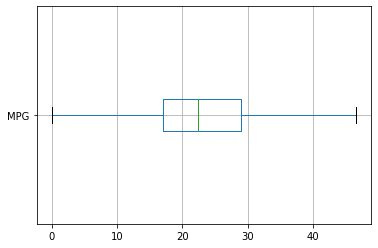

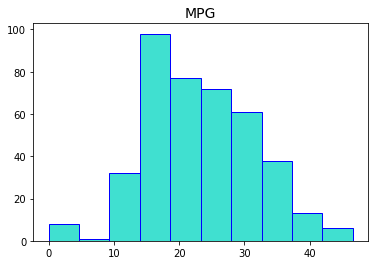

***Graph for Discrete data***



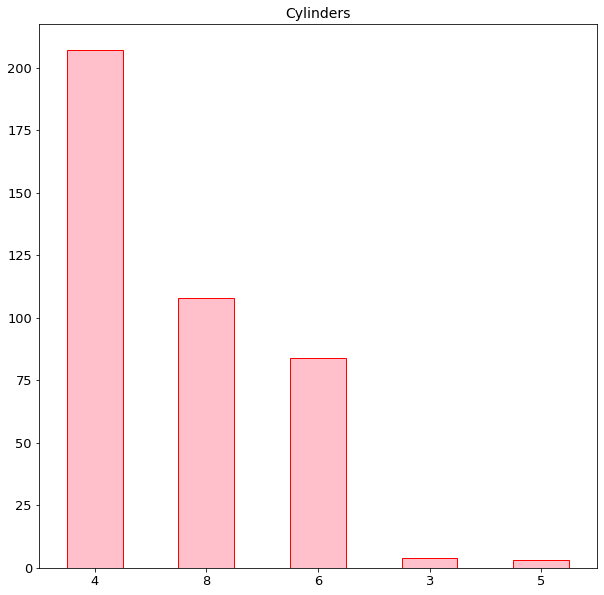

***Graph for Continuous data***



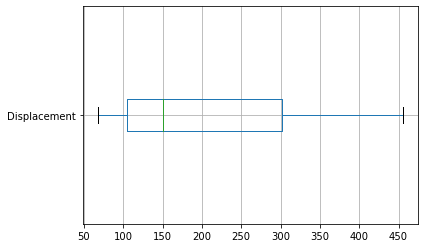

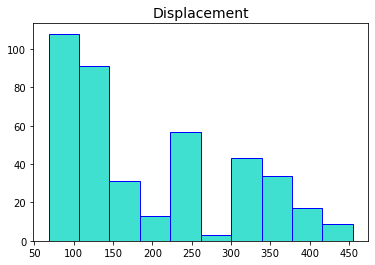

***Graph for Continuous data***



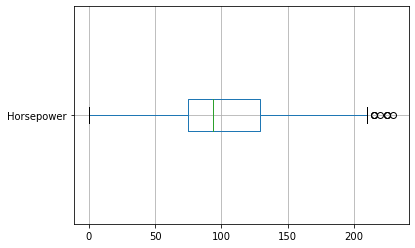

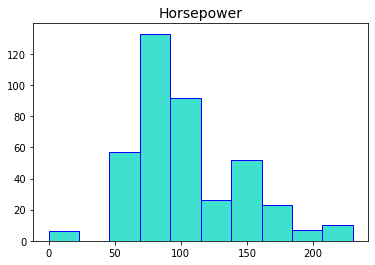

***Graph for Continuous data***



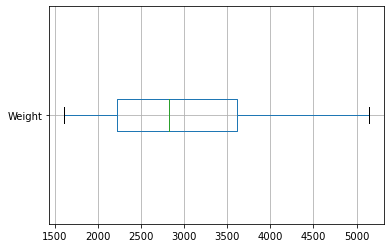

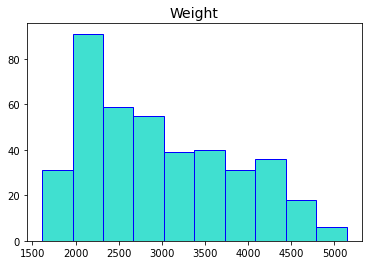

***Graph for Continuous data***



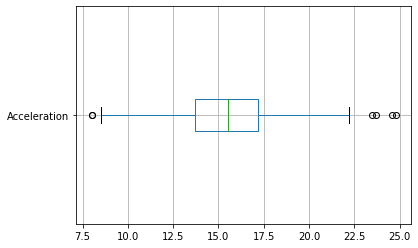

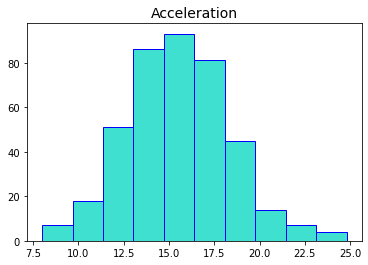

***Graph for Continuous data***



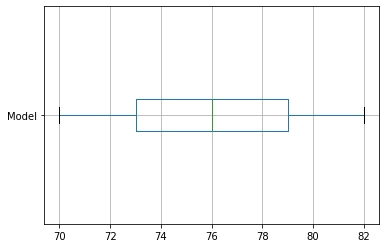

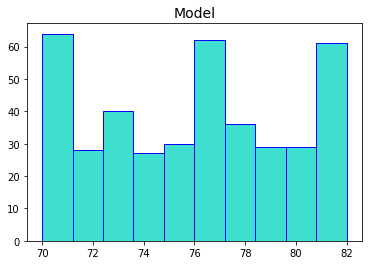


***Graphs for Categorical data***



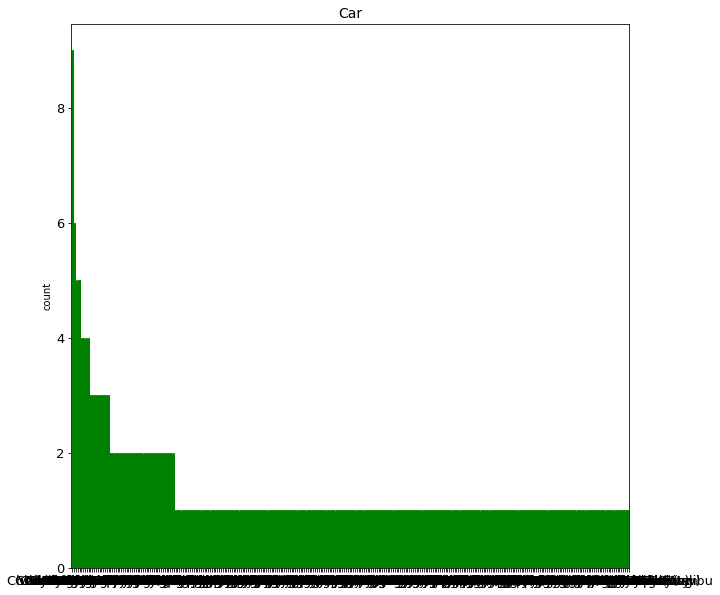

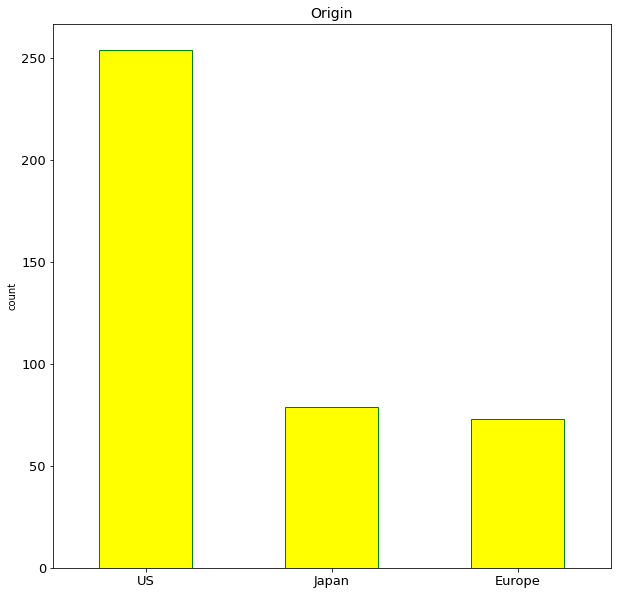

In [ ]:
Graph_final(data, columns = '', directory = "/Users/pranavsmac/Documents/graph export")

----------------------------------------------------------------------------------

# Time Series Visualisation

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
%matplotlib inline

In [ ]:
def plot_time_series(data, date, value):
    """
    Function to generate various time series plots for two columns of a DataFrame.

    Parameters:
        data (DataFrame): The input DataFrame containing time series data.
        date (str): Name of the column containing the date values.
        value (str): Name of the column containing the time series values.
    """
    # Ensure 'Date' column is set as the index and is of the correct datetime format
    #data[date] = pd.to_datetime(data[date])
    #data.set_index(date, inplace=True)

    # Line Plot
    plt.figure(figsize=(12, 6))
    plt.plot(data[value], marker='.', linestyle='-', color='blue')
    plt.xlabel(date)
    plt.ylabel(value)
    plt.title(f'{date} vs. {value}')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Scatter Plot
    plt.figure(figsize=(12, 6))
    plt.scatter(data.index, data[value])
    plt.xlabel(date)
    plt.ylabel(value)
    plt.title('Scatter Plot')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Area Plot
    plt.figure(figsize=(12, 6))
    plt.fill_between(data.index, data[value], alpha=0.5)
    plt.xlabel(date)
    plt.ylabel(value)
    plt.title('Area Plot')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Histogram
    plt.figure(figsize=(10, 5))
    data.hist(column=value, bins=20, ax=plt.gca(), color = "turquoise", edgecolor = "blue")
    plt.xlabel(value)
    plt.ylabel('frequency')
    plt.title(value)
    plt.show()

    #Boxplot
    # Set the Seaborn theme (e.g., "darkgrid", "whitegrid", "dark", "white", "ticks", etc.)
    sns.set_theme(style="dark")
    data.boxplot(column=value, grid = True,figsize = (6,4),vert = False)  #boxplot


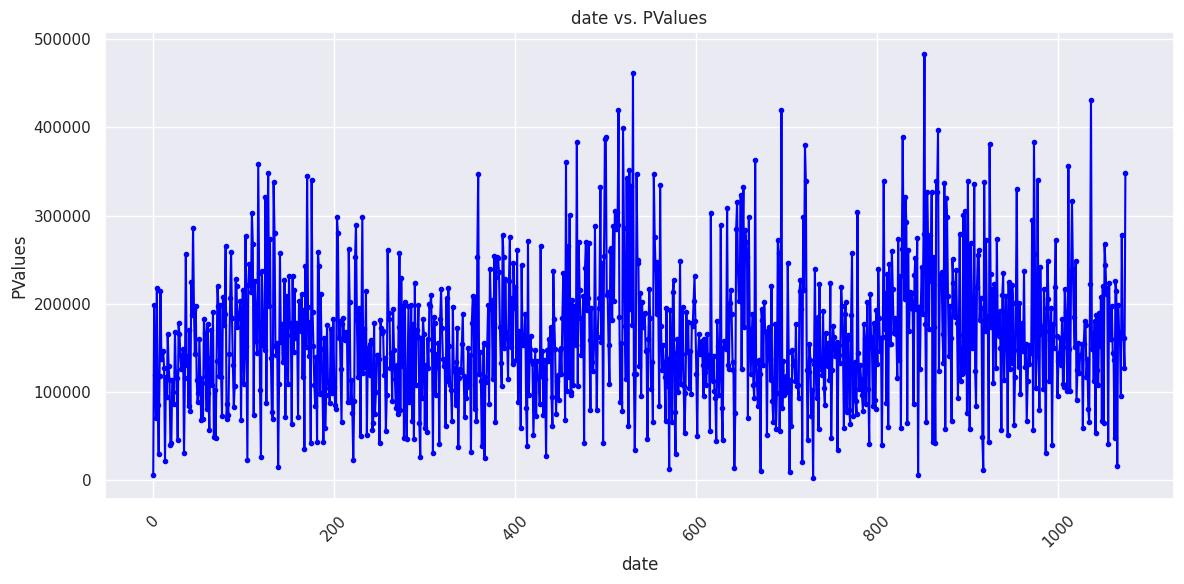

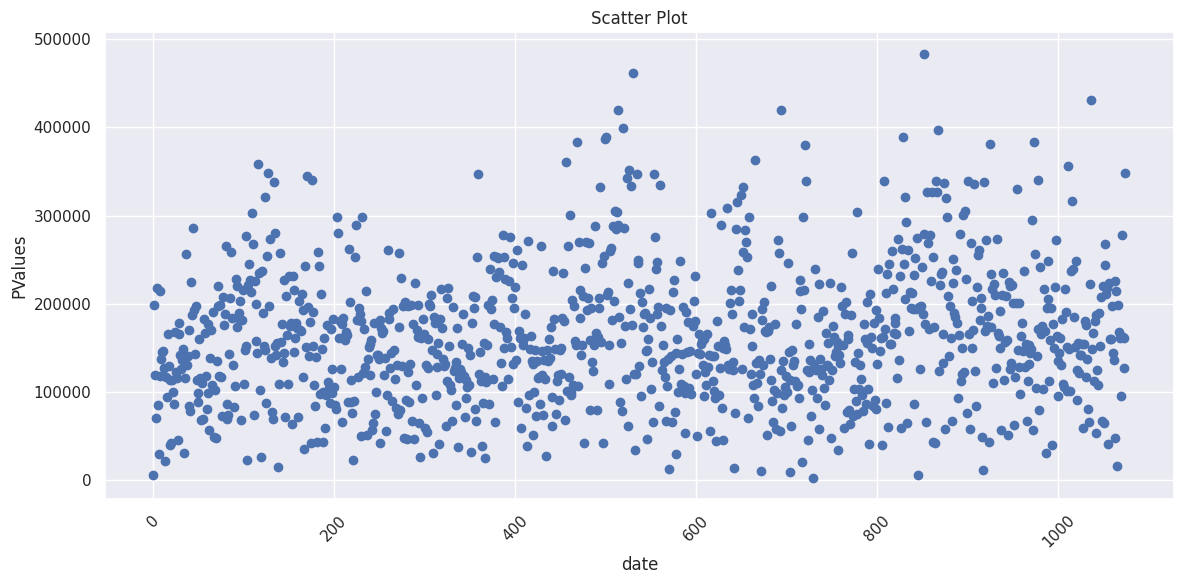

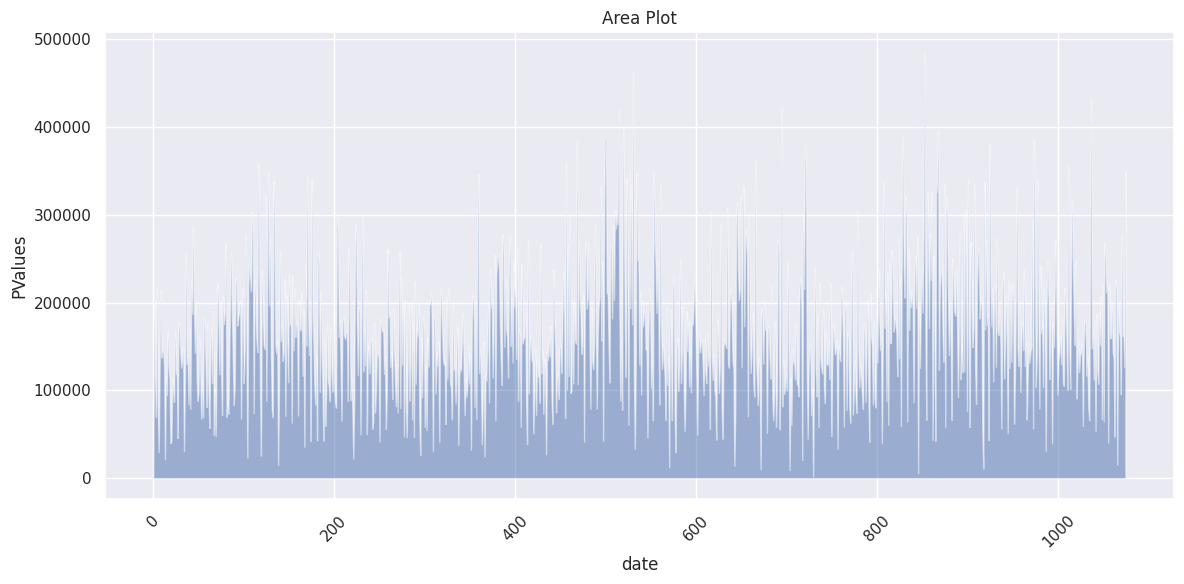

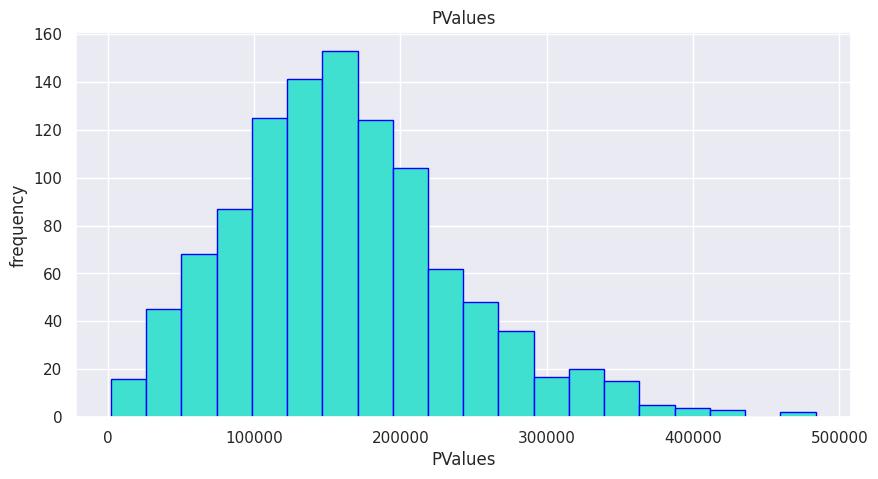

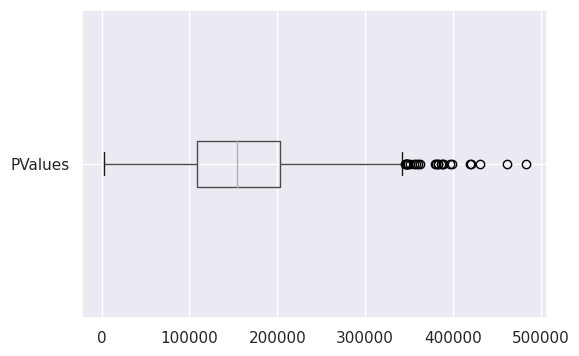

In [ ]:
# Call the function to generate plots
plot_time_series(df, 'date', 'PValues')

*** The End ***